# Spectra Dataset

In [2]:
from visualdl import vdl
import json
from openpyxl import load_workbook
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt

C:\Users\HSA\miniconda3\envs\hsa-web\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [133]:
train_x, train_y = [], []
valid_x, valid_y= [], []

In [134]:
# Einzelsubstanzen
def get_csv_data(file_path):
    with open(file_path, encoding = "utf-8") as handle:
        data = pd.read_csv(file_path, sep = ';',skiprows=list(range(0, 89)), header=None)
    return data

csv_path = r"C:\Users\HSA\Desktop\Spektren\Einzelsubstanzen\csv Dateien"
for cnt, csv in enumerate(os.listdir(csv_path)):
    csv_file_path = os.path.join(csv_path, csv)
    csv_data = get_csv_data(csv_file_path)

    if ("Chromotrope") in csv:
        if csv.split(",")[0][-1] == "2":
            val = 12.
        elif  csv.split(",")[0][-1] == "0":
            val = 0.5
        elif  csv.split(",")[0][-1] == "1":
            val = 1.5
        else:
            val =  csv.split(",")[0][-1]
        val = float(val)
        x_data = [val, 0, 0]
    elif ("Chromtrope") in csv:
        if csv.split(",")[0][-1] == "2":
            val = 12.
        elif  csv.split(",")[0][-1] == "0":
            val = 0.5
        elif  csv.split(",")[0][-1] == "1":
            val = 1.5
        else:
            val =  csv.split(",")[0][-1]
        val = float(val)
        x_data = [val, 0, 0]
    elif "Erioglaucine" in csv:
        if csv.split(".")[0][-1] == "2":
            val = 12.
        elif  csv.split(".")[0][-1] == "0":
            val = 0.5
        elif  csv.split(".")[0][-1] == "1":
            val = 1.5
        else:
            val =  csv.split(".")[0][-1]
        val = float(val)
        x_data = [0, val, 0]
    elif "Riboflavin" in csv:
        if csv.split(",")[0][-1] == "2":
            val = 12.
        elif  csv.split(",")[0][-1] == "0":
            val = 0.5
        elif  csv.split(",")[0][-1] == "1":
            val = 1.5
        else:
            val =  csv.split(",")[0][-1]
        val = float(val)
        x_data = [0, 0, val]
    else:
        print(f"no valid substance: {csv}")
        continue
    
    all_values = list(map(lambda x: [float(x[i].replace(",", ".")) if type(x[i]) is str else x[i] for i in range(2)], csv_data.values.tolist()))
    idx = list(np.round(np.linspace(0, len(all_values) - 1, 100)).astype(int))
    y_values = [all_values[i] for i in idx]
    
    if cnt%6 == 0:
        valid_x.append(x_data)
        valid_y.append(y_values)
    else:    
        train_x.append(x_data)
        train_y.append(y_values)

In [135]:
# Gemische
file_path = r"C:\Users\HSA\Desktop\Spektren\Gemische\Pulvermischungen Tabletten_neue Einwaage für M44.xlsx"
spectra_dir = r"C:\Users\HSA\Desktop\Spektren\Gemische\csv Dateien"
wb = load_workbook(filename = file_path, data_only=True)
sheet = wb['Zusammenfassung']

spectra_files = os.listdir(spectra_dir)
for cnt, i in enumerate(range(3,67)):
    print(sheet[f'A{i}'].value)
    file_name = sheet[f'A{i}'].value
    file_number = file_name[-2:]
    file_number = file_number if file_number[0] != "0" else file_number[1]
    samples = [x for x in spectra_files if ("Tablette " + file_number + "_") in x]
    
    for sample in samples:        
        with open(file_path, encoding = "utf-8") as handle:
            csv_data = pd.read_csv(os.path.join(spectra_dir, sample), sep = ';',skiprows=list(range(0, 89)), header=None)
    
        all_values = list(map(lambda x: [float(x[i].replace(",", ".")) if type(x[i]) is str else x[i] for i in range(2)], csv_data.values.tolist()))
        idx = list(np.round(np.linspace(0, len(all_values) - 1, 100)).astype(int))
        y_values = [all_values[i] for i in idx]
        
        if cnt%6 == 0:
            valid_x.append([sheet[f'G{i}'].value, sheet[f'F{i}'].value, sheet[f'H{i}'].value])
            valid_y.append(y_values)
        else:    
            train_x.append([sheet[f'G{i}'].value, sheet[f'F{i}'].value, sheet[f'H{i}'].value])
            train_y.append(y_values)

Pulvermischung 01
Pulvermischung 02
Pulvermischung 03
Pulvermischung 04
Pulvermischung 05
Pulvermischung 06
Pulvermischung 07
Pulvermischung 08
Pulvermischung 09
Pulvermischung 10
Pulvermischung 11
Pulvermischung 12
Pulvermischung 13
Pulvermischung 14
Pulvermischung 15
Pulvermischung 16
Pulvermischung 17
Pulvermischung 18
Pulvermischung 19
Pulvermischung 20
Pulvermischung 21
Pulvermischung 22
Pulvermischung 23
Pulvermischung 24
Pulvermischung 25
Pulvermischung 26
Pulvermischung 27
Pulvermischung 28
Pulvermischung 29
Pulvermischung 30
Pulvermischung 31
Pulvermischung 32
Pulvermischung 33
Pulvermischung 34
Pulvermischung 35
Pulvermischung 36
Pulvermischung 37
Pulvermischung 38
Pulvermischung 39
Pulvermischung 40
Pulvermischung 41
Pulvermischung 42
Pulvermischung 43
Pulvermischung 44
Pulvermischung 45
Pulvermischung 46
Pulvermischung 47
Pulvermischung 48
Pulvermischung 49
Pulvermischung 50
Pulvermischung 51
Pulvermischung 52
Pulvermischung 53
Pulvermischung 54
Pulvermischung 55
Pulvermisc

In [136]:
final_dict_train = {}
for cnt, (x,y) in enumerate(zip(train_x, train_y)):
    final_dict_train[cnt] = {"concentrations": x, "spectrum": y}

In [137]:
with open("dataset_train.json", "w", encoding = "utf-8") as handle:
    json.dump(final_dict_train, handle)

In [138]:
with open('dataset_train.json', 'r') as f:
    data_train = json.load(f)

In [139]:
final_dict_valid = {}
for cnt, (x,y) in enumerate(zip(valid_x, valid_y)):
    final_dict_valid[cnt] = {"concentrations": x, "spectrum": y}

In [140]:
with open("dataset_valid.json", "w", encoding = "utf-8") as handle:
    json.dump(final_dict_valid, handle)

In [141]:
with open('dataset_valid.json', 'r') as f:
    data_valid = json.load(f)

In [142]:
data_train.keys()

dict_keys(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89', '90', '91', '92', '93', '94', '95', '96', '97', '98', '99', '100', '101', '102', '103', '104', '105', '106', '107', '108', '109', '110', '111', '112', '113', '114', '115', '116', '117', '118', '119', '120', '121', '122', '123', '124', '125', '126', '127', '128', '129', '130', '131', '132', '133', '134', '135', '136', '137', '138', '139', '140', '141', '142', '143', '144', '145', '146', '147', '148', '149', '150', '151', '152', '153', '154', '155', '156', 

In [143]:
data_valid.keys()

dict_keys(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47'])

## Test Model

In [3]:
model = vdl.get_inference_model(r"C:\Users\HSA\Desktop\Spektren\model.pt", "mlp")

In [37]:
predictions = model.predict([[1.05, 2.05, 0.54],
                            [1.04, 0.5, 2.04]])

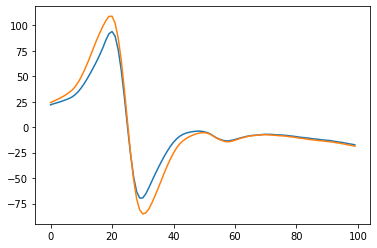

In [40]:
for pred in predictions:
    plt.plot(list(range(pred.size)), list(pred))

plt.savefig("Chromotrope verpresste Tablette 0,5 Messung 1_result.png")